# EDA - 4
***
label 的 密度图

In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm

import sys
sys.path.append(os.path.abspath('..'))

from tools.mask import plotgen
from tools.data_gen import DataGen

In [2]:
csv_path = os.path.join('..', 'data', 'train.csv')
train_path = os.path.join('..', 'data', 'train_images')

seg_train_gen_params = {
    'csv_path': csv_path,
    'train_path': train_path,
    'height': 256,
    'width': 1600, 
    'col': False,
    'sep':'[_,]',
    'n_class': 5
}

datagen = DataGen()
gen = datagen.seg_train_gen(**seg_train_gen_params)

labelmap = np.zeros([256, 1600, 4])

for idx, i in tqdm(enumerate(gen)):
    img = np.frombuffer(i['img'], dtype='uint8').reshape([256, 1600, 3]).astype('float32')
    label = np.frombuffer(i['label'], dtype='uint8').reshape([256, 1600, 5])[...,:4].astype('float32')
    labelmap += label

12568it [08:24, 24.90it/s]

504.7615690231323


In [7]:
for i in range(4):
    print(f'layer{i} value is {np.sum(labelmap[..., i])}')

layer0 value is 3912129.0
layer1 value is 834471.0
layer2 value is 131306899.0
layer3 value is 27533572.0


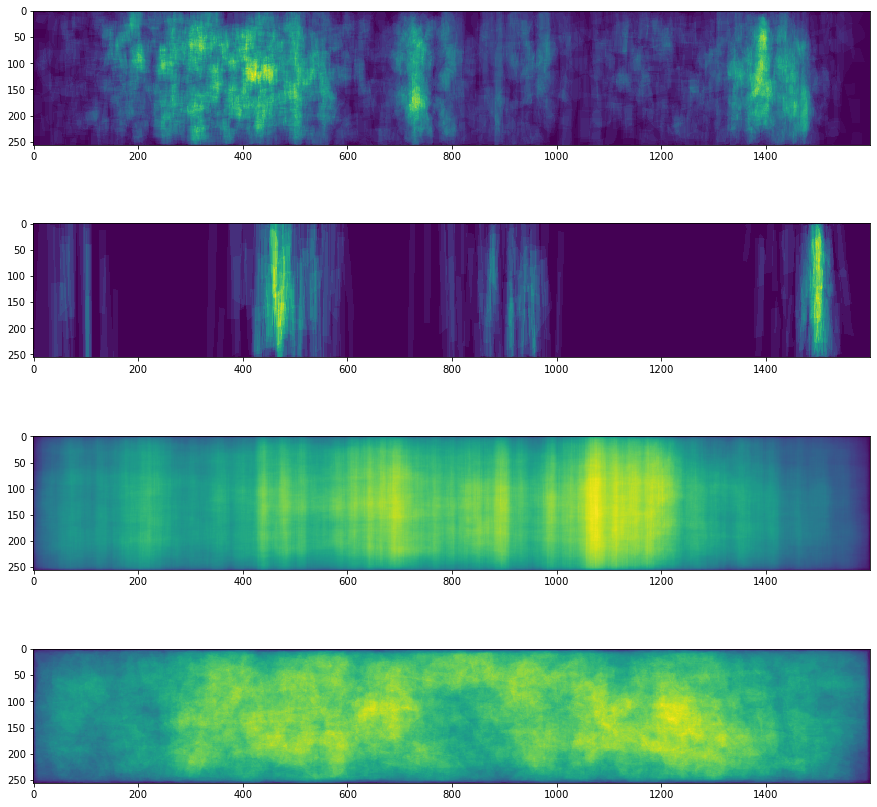

In [6]:
#labelmax = np.max(np.max(labelmap, axis=0), axis=0)
#labelmap = labelmax / labelmap
plt.figure(figsize=[15, 15])
for i in range(4):
    plt.subplot(4, 1, i+1)
    plt.imshow(labelmap[..., i])